<a href="https://colab.research.google.com/github/Danhh-zk/Data-Analysis-with-Python-Projects/blob/main/Netflix_Movies_and_TV_Shows_Cleaning_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#import the needed packages
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read the data
df = pd.read_csv('/content/netflix_titles.csv')
diabetes_unc = df

In [ ]:
# let's explore the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# get the column
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe().style.background_gradient(cmap = 'coolwarm')

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

# Assuming df is your DataFrame
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['title'] = df['title'].str.title()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      0 non-null      float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


In [ ]:
# let's explore the data
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#check the null (missing values)
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,False,False
3,False,False,False,True,True,True,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,True,False,False
8803,False,False,False,True,True,True,False,False,False,True,False,False
8804,False,False,False,False,False,False,False,False,False,True,False,False
8805,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration        8807
listed_in          0
description        0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

<ipython-input-53-04e87d67d337>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
<ipython-input-53-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration        8807
listed_in          0
description        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['rating'] = df['rating'].replace({
                'PG-13': 'Teens',
                'TV-MA': 'Adults',
                'PG': 'Kids',
                'TV-14': 'Teens',
                'TV-PG': 'Kids',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids',
                'R': 'Adults',
                'TV-G': 'Kids',
                'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'Adults',
                'UR' : 'Adults',
                'TV-Y7-FV': 'Kids'

})

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration        8807
listed_in          0
description        0
dtype: int64

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
df_type = df.groupby('type')['show_id'].count().reset_index()
df_type = df_type.rename(columns = {'show_id':'count_type'})
df_type_count = df_type['count_type'].sum()
df_type['count_percentage'] = df_type['count_type']/df_type_count
df_type

,type,count_type,count_percentage
0,Movie,6131,0.696151
1,TV Show,2676,0.303849


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1, specs=[[{'type':'bar'}]])

fig.add_trace(
    go.Bar(
        x=df_type['count_type'],
        y=df_type['type'],
        orientation='h',
        marker=dict(color=["#b20710", "#f5f5f1"]),
        showlegend=False,
        text=df_type['count_type'],
        textposition='auto'
    ),
    row=1, col=1
)



fig.update_layout(
    title_text='movies are the most common type on netflix')


fig.show()

In [ ]:
df_rating = df.groupby('rating')['show_id'].count().reset_index()
df_rating = df_rating.rename(columns = {'show_id':'count_rating'})
df_rating_count = df_rating['count_rating'].sum()
df_rating['count_percentage'] = df_rating['count_rating']/df_rating_count
df_rating

,rating,count_rating,count_percentage
0,66 min,1,0.000114
1,74 min,1,0.000114
2,84 min,1,0.000114
3,Adults,4092,0.464630
4,Kids,2058,0.233678
5,Teens,2650,0.300897
6,Unknown,4,0.000454


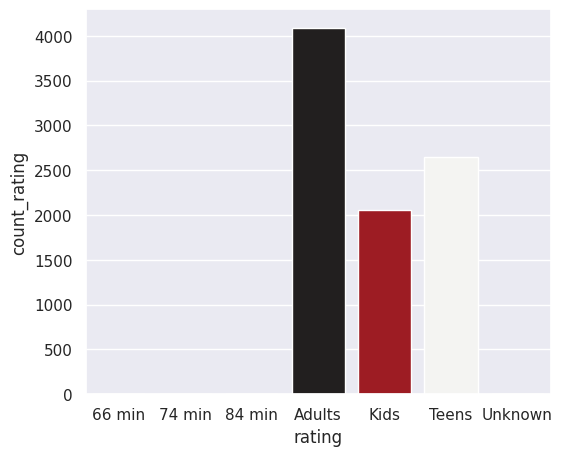

In [ ]:
plt.figure(figsize=(6,5))
sn.set(style="darkgrid")
ax = sn.barplot(x="rating", y="count_rating", data=df_rating, palette=['#221f1f','#b20710','#f5f5f1'], hue_order=df_rating['count_rating'])

In [ ]:
df_country = df[['show_id', 'title', 'type', 'country']]
split_countries = (
    df_country.drop('country', axis=1)
    .join(
        df_country['country'].str.split(', ', expand=True)
        # note that in original dataframe: the country fields can contain more than one country and they are seperated by ', '
        .stack()
        .reset_index(drop=True, level=1)
        .rename('country')
    )
)
print(split_countries)

     show_id                  title     type        country
0         s1   Dick Johnson Is Dead    Movie  United States
1         s2          Blood & Water  TV Show   South Africa
2         s3              Ganglands  TV Show        Unknown
3         s4  Jailbirds New Orleans  TV Show        Unknown
4         s5           Kota Factory  TV Show          India
...      ...                    ...      ...            ...
8802   s8803                 Zodiac    Movie  United States
8803   s8804            Zombie Dumb  TV Show        Unknown
8804   s8805             Zombieland    Movie  United States
8805   s8806                   Zoom    Movie  United States
8806   s8807                 Zubaan    Movie          India

[10845 rows x 4 columns]


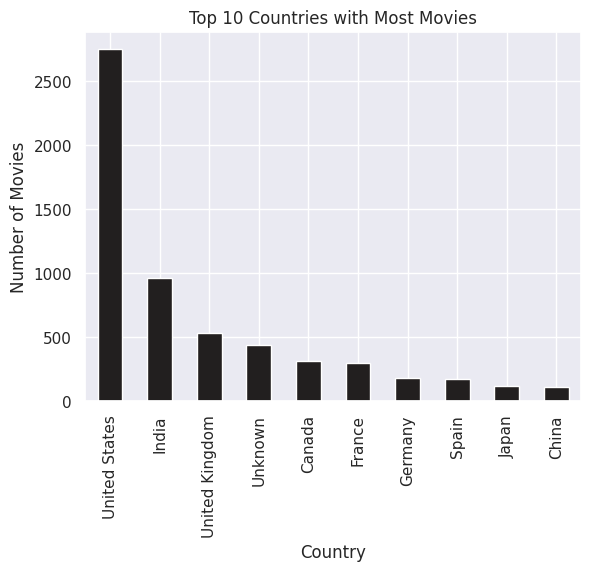

In [ ]:
Netflix_colors = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']

movie_counts = split_countries[split_countries['type'] == 'Movie']['country'].value_counts().head(10)
movie_counts.plot(kind='bar', title='Top 10 Countries with Most Movies', color=Netflix_colors[0])
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

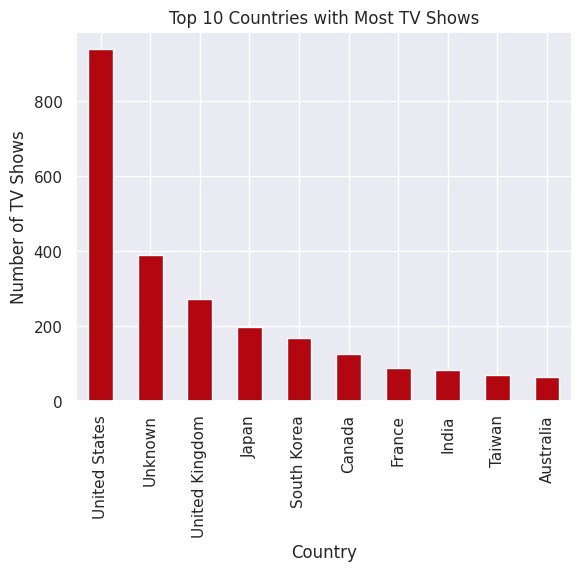

In [ ]:
tv_show_counts = split_countries[split_countries['type'] == 'TV Show']['country'].value_counts().head(10)
tv_show_counts.plot(kind='bar', title='Top 10 Countries with Most TV Shows', color=Netflix_colors[1])
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.show()

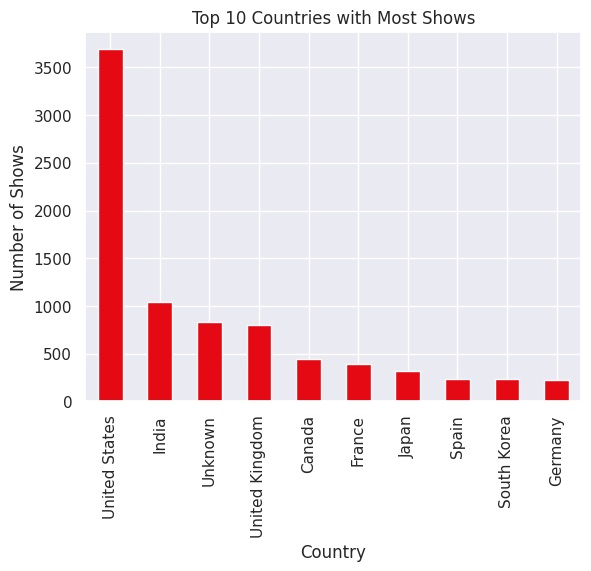

In [ ]:
total_counts = split_countries['country'].value_counts().head(10)
total_counts.plot(kind='bar', title='Top 10 Countries with Most Shows', color=Netflix_colors[2])
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

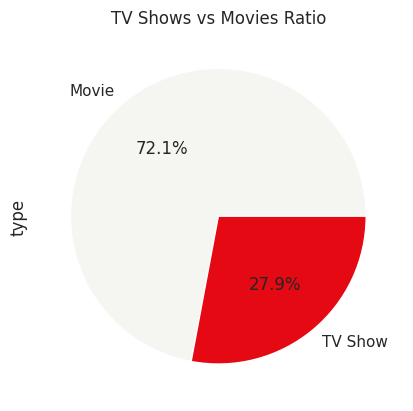

In [ ]:
total_type_counts = split_countries['type'].value_counts()
type_percentage = total_type_counts / total_type_counts.sum() * 100

type_percentage.plot(kind='pie', autopct='%1.1f%%', labels=type_percentage.index, title='TV Shows vs Movies Ratio', colors=[Netflix_colors[3],Netflix_colors[2]])
plt.show()